<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_lesson_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будем решать задачу регрессии. Поработаем с данными о стоимости домов в
Калифорнии. Задача — предсказать стоимость домов по различным числовым
характеристикам:
- MedInc — средний доход жителей.
- HouseAge — возраст дома.
- AveRooms — среднее количество комнат в доме и так далее.
Подробное описание признаков можно прочесть в документации датасета.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [ ]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


В образовательных целях исследования и предобработки данных часто опускается
этап изучения датасета на наличие дубликатов, пропусков, некорректных значений
и так далее. Однако на практике при работе с данными до моделирования об этом
не стоит забывать.
Например, рассмотрим датасет на наличие пропусков.

In [ ]:
X.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


Отлично, в данных нет пропущенных значений.
Перейдём к построению и оценке качества моделей.
Разобьём данные на train и test и обучим на них сначала решающее дерево с
параметрами по умолчанию.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(Xtrain, ytrain)
DecisionTreeRegressor()

DecisionTreeRegressor()

Сделаем предсказание на тестовых данных и оценим ошибку MSE.

In [ ]:
pred_dt = model_dt.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, pred_dt)

0.5361255935118605

Теперь обучим на тренировочных данных случайный лес с параметрами по
умолчанию.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(Xtrain, ytrain)
RandomForestRegressor()

RandomForestRegressor()

Сделаем предсказание на тесте и оценим ошибку MSE.

In [ ]:
pred_rf = model_rf.predict(Xtest)
mean_squared_error(ytest, pred_rf)

0.25896481113689507

Ошибка у леса в два раза меньше, чем у дерева!
Теперь изучим гиперпараметры леса.
?RandomForestRegressor

- n_estimators — число деревьев;
- criterion — критерий информативности для построения дерева;
- max_depth — глубина деревьев в лесу;
- min_samples_split — минимальное число объектов, необходимое для
разбиения вершины;
- min_samples_leaf — минимальное число объектов в вершине, для того
чтобы она была листом;
- max_features — максимальное число признаков, из которых ищем
наилучшее разбиение на каждом шаге построения дерева;
- max_samples — максимальное количество объектов в подвыборке,
сформированной при помощи бутстрепа из исходной выборки.
Посмотрим, как меняется качество предсказания в зависимости от числа деревьев
в лесу.

In [ ]:
N = []
MSE = []
for n in np.arange(10, 120, 20):
  rf = RandomForestRegressor(n_estimators = n)
  rf.fit(Xtrain, ytrain)
  pred_rf = rf.predict(Xtest)
  N.append(n)
  MSE.append(mean_squared_error(ytest, pred_rf))

Text(0, 0.5, 'MSE on test')

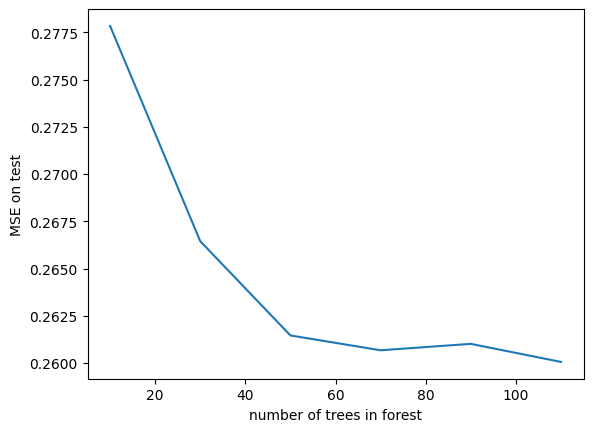

In [ ]:
from matplotlib import pyplot as plt
plt.plot(N, MSE, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('MSE on test')

Мы наблюдаем важную зависимость, и это неплохо запомнить: случайный лес не
переобучается с увеличением числа деревьев!
То есть чем больше деревьев в лесу, тем меньше будет ошибка на тестовых данных.
Однако начиная с какого-то числа деревьев ошибка уменьшается совсем
незначительно, а при дальнейшем увеличении числа деревьев скорость обучения
алгоритма падает.
Поэтому обычно выбирают минимальное число деревьев в лесу, при котором
ошибка на тесте перестаёт сильно убывать.
Возьмём 100 деревьев в лесу, так как при 100 деревьях ошибка убывает уже
несильно. Теперь будем перебирать глубину деревьев аналогичным образом.

In [ ]:
D = []
MSE = []
for d in np.arange(2, 50, 5):
  rf = RandomForestRegressor(n_estimators = 100, max_depth = d)
  rf.fit(Xtrain, ytrain)
  pred_rf = rf.predict(Xtest)
  D.append(d)
  MSE.append(mean_squared_error(ytest, pred_rf))

Text(0, 0.5, 'MSE on test')

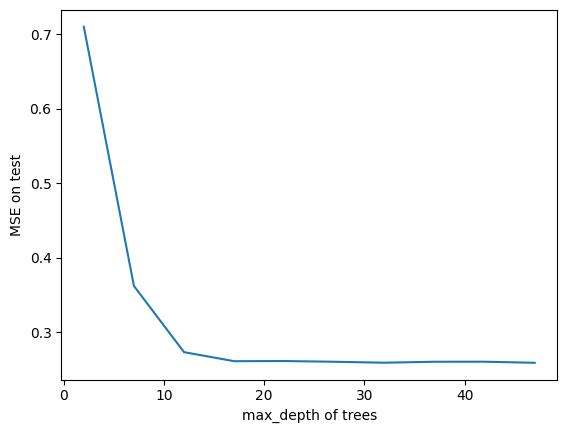

In [ ]:
plt.plot(D, MSE, '-')
plt.xlabel('max_depth of trees')
plt.ylabel('MSE on test')

Мы видим, что сначала при увеличении глубины деревьев ошибка падает, а затем,
примерно с глубины 20, ошибка начинает расти, то есть начинается переобучение.
Значит, для леса со 100 деревьями надо брать деревья максимальной глубины — 20.
Проверим, каких значений метрики удастся достичь при обучении случайного леса
с найденными значениями гиперпараметров.

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 100, max_depth = 20)
model_rf.fit(Xtrain, ytrain)
pred_rf = model_rf.predict(Xtest)
mean_squared_error(ytest, pred_rf)

0.2578143428001895

С помощью подбора гиперпараметров удалось значительно снизить ошибку по
сравнению с лесом, работающим с гиперпараметрами по умолчанию.
Другие гиперпараметры леса также важно подбирать, однако ручной перебор
гиперпараметров сложен и может привести к переобучению.
Давайте оценим качество последней модели по кросс-валидации, чтобы без
привязки к разбиению на train-test оценить качество и переобучение модели.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(n_estimators = 100, max_depth =
20), X, y, cv=3, scoring='neg_mean_squared_error')

In [ ]:
scores

array([-0.51236216, -0.3342746 , -0.53437293])

In [ ]:
import numpy as np

In [ ]:
np.mean(-scores)

0.4603365633141235

In [ ]:
np.std(-scores)

0.0895910425074557

По стандартному отклонению метрики на кросс-валидации можно сказать, что
наблюдается переобучение модели и нужно аккуратнее подбирать её
гиперпараметры. Визуальный подбор может давать плохие результаты.